# Exploring and cleaning the data
We use this first notebook to play around with the new data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from datetime import datetime
from numpy import count_nonzero
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

### Loading the data and metadata (md, info of stations) for some exploration

In [2]:
data = []
md = [] # metadata info on bike stations

for year in range (2014,2018):
    for month in range(4,12):
        _filename = str(year) + "/OD_" + str(year) + "-" + str(month).zfill(2) + ".csv"
        print(_filename)
        data.append(pd.read_csv(_filename))
    md.append(pd.read_csv('%i/Stations_%i.csv' % (year,year)) )

2014/OD_2014-04.csv
2014/OD_2014-05.csv
2014/OD_2014-06.csv
2014/OD_2014-07.csv
2014/OD_2014-08.csv
2014/OD_2014-09.csv
2014/OD_2014-10.csv
2014/OD_2014-11.csv
2015/OD_2015-04.csv
2015/OD_2015-05.csv
2015/OD_2015-06.csv
2015/OD_2015-07.csv
2015/OD_2015-08.csv
2015/OD_2015-09.csv
2015/OD_2015-10.csv
2015/OD_2015-11.csv
2016/OD_2016-04.csv
2016/OD_2016-05.csv
2016/OD_2016-06.csv
2016/OD_2016-07.csv
2016/OD_2016-08.csv
2016/OD_2016-09.csv
2016/OD_2016-10.csv
2016/OD_2016-11.csv
2017/OD_2017-04.csv
2017/OD_2017-05.csv
2017/OD_2017-06.csv
2017/OD_2017-07.csv
2017/OD_2017-08.csv
2017/OD_2017-09.csv
2017/OD_2017-10.csv
2017/OD_2017-11.csv


In [3]:
md[0].head()

,code,name,latitude,longitude
0,6209,Milton / Clark,45.512520,-73.570620
1,6436,Côte St-Antoine / Clarke,45.486452,-73.595234
2,6214,Square St-Louis,45.517350,-73.569060
3,6248,St-Dominique / Rachel,45.518593,-73.581566
4,6164,Chambord / Laurier,45.532955,-73.584194


In [4]:
# Random check that the station numbers are consistent across the different data yearly sources
print(md[0][md[0]['code']==6015])
print(md[3][md[3]['code']==6015])
print(md[0][md[0]['code']==6184])
print(md[3][md[3]['code']==6184])

     code                    name   latitude  longitude
105  6015  Berri / de Maisonneuve  45.515299 -73.561273
     code                    name   latitude  longitude
215  6015  Berri / de Maisonneuve  45.515299 -73.561273
    code                                       name   latitude  longitude
55  6184  Métro Mont-Royal (Rivard / du Mont-Royal)  45.524673  -73.58255
     code                                       name   latitude  longitude
287  6184  Métro Mont-Royal (Rivard / du Mont-Royal)  45.524673  -73.58255


In [5]:
data[0].head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,2014-04-15 00:01,6209,2014-04-15 00:18,6436,1061,1
1,2014-04-15 00:01,6214,2014-04-15 00:11,6248,615,1
2,2014-04-15 00:01,6164,2014-04-15 00:18,6216,1031,1
3,2014-04-15 00:01,6214,2014-04-15 00:24,6082,1382,1
4,2014-04-15 00:02,6149,2014-04-15 00:08,6265,347,1


In [6]:
# Getting general info about the dataset in a single year: number of trips, number of stations, number of trips for members...
print("Number of stations in 2017: ", len(md[3]))
n_trips = 0
n_trips_members = 0
avg_duration = 0.0
for i in range(8):
    n_trips += len(data[24 + i])
    n_trips_members += len(data[24 + i][data[24+i]['is_member']==1])
    avg_duration += sum(data[24 + i]['duration_sec'])
print("Number of trips in 2017: ", n_trips)
print("Number of trips by members in 2017: ", n_trips_members, " (%.2f %%)" % (n_trips_members * 100.0 / n_trips))
print("Average trip duration in seconds in 2017:  %.2f" % (avg_duration / n_trips))

Number of stations in 2017:  546
Number of trips in 2017:  4740357
Number of trips by members in 2017:  3844806  (81.11 %)
Average trip duration in seconds in 2017:  818.16


<br />

## Building the dataset

We filter each monthly datasets for any trips made between Mont Royal and Berri UQAM, and group them in the same dataset

In [7]:
dataset = pd.DataFrame()
for i in range(len(data)):
    dataset = pd.concat([ 
                            dataset, 
                            data[i][(data[i]['start_station_code']==6184) & (data[i]['end_station_code']==6015)].copy()
                        ])
dataset.reset_index(inplace=True)

In [8]:
dataset['start_date'] = pd.to_datetime(dataset['start_date'])
dataset['end_date'] = pd.to_datetime(dataset['end_date'])
dataset['date'] = dataset['start_date'].dt.normalize()

In [9]:
dataset.head()

,index,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,date
0,138,2014-04-15 07:53:00,6184,2014-04-15 08:02:00,6015,517,1,2014-04-15
1,3257,2014-04-16 16:55:00,6184,2014-04-16 17:06:00,6015,686,1,2014-04-16
2,3773,2014-04-16 18:11:00,6184,2014-04-16 18:18:00,6015,439,1,2014-04-16
3,4028,2014-04-16 18:53:00,6184,2014-04-16 19:03:00,6015,580,1,2014-04-16
4,5672,2014-04-17 08:58:00,6184,2014-04-17 09:05:00,6015,412,1,2014-04-17


<br />

### Grouping by daily count of trips

Our goal is to predict the daily trips done between Metro Mont-Royal and Berri UQAM. We can aggregate the raw data obtained into counts of daily trips as well as the daily trips made by members only. We add a few temporal views of the data to later plot the number of trips by day of week, month and year.

In [10]:
daily_trips = dataset.groupby('date')['start_date','is_member'] \
                      .agg(trips = ('is_member', 'count'), \
                           member_trips = ('is_member', 'sum'))
daily_trips 
daily_trips['dow'] = daily_trips.index.weekday # fetch the weekday
daily_trips['month'] = daily_trips.index.month # fetch months
daily_trips['year'] = daily_trips.index.year # fetch year

<br />


### EDA plots
As we prep the final dataset to be ingested by our forecasting models, we make a few plots to see how to finally breakdown the data in order to answer the key questions, namely:
1. Using the from year 2014 to the 31st of August 2017
2. Forecasting the first full week of September of 2017 (monday the 4th to Sunday the 10th)

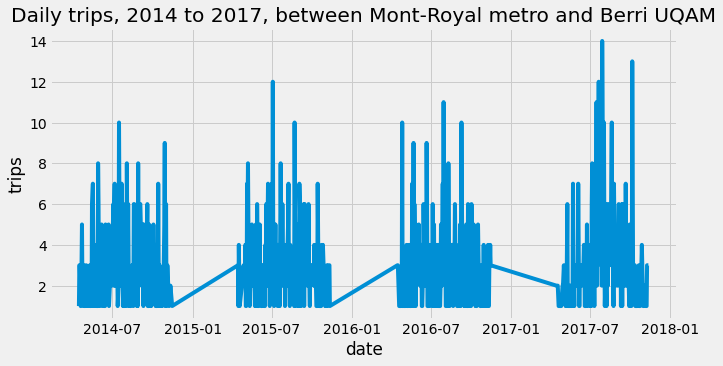

In [11]:
# Plotting the daily counts
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_trips, x='date', y='trips')
plt.title("Daily trips, 2014 to 2017, between Mont-Royal metro and Berri UQAM")
plt.grid(True)
plt.show()

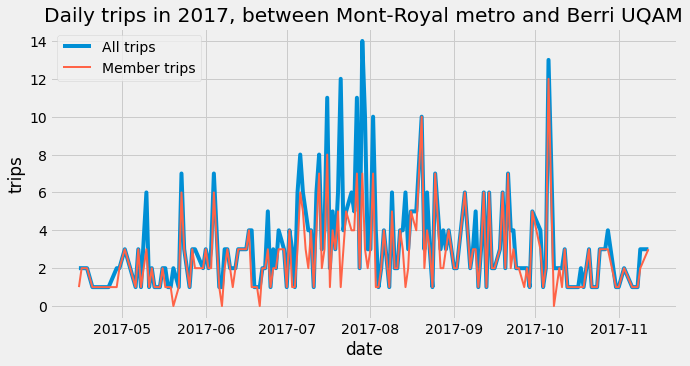

In [12]:
# Plotting the daily counts in 2017
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_trips[daily_trips.index > datetime.strptime('2017-01-01', '%Y-%m-%d')], x='date', y='trips', label='All trips')
sns.lineplot(data=daily_trips[daily_trips.index > datetime.strptime('2017-01-01', '%Y-%m-%d')], x='date', y='member_trips', color='tomato', linewidth=2, label='Member trips')
plt.title("Daily trips in 2017, between Mont-Royal metro and Berri UQAM")
plt.legend()
plt.grid(True)
plt.show()

#### Plotting the weeklyand monthly total trips to check for seasonality dominance.
A part from a dip in trips on Mondays, the rest of the week is not significantly impacted by seasonality. On the other end, the monthly plot displays *clear signs of monthly seasonalities*, with for instance, July being a big month of bike trips.

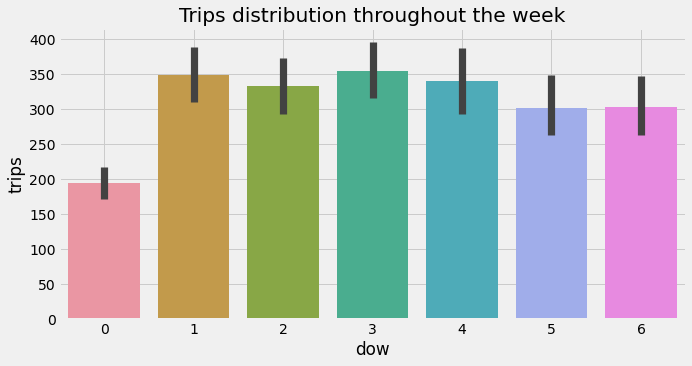

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=daily_trips, x='dow', y='trips', estimator=sum)
plt.title("Trips distribution throughout the week")
plt.grid(True)
plt.show()

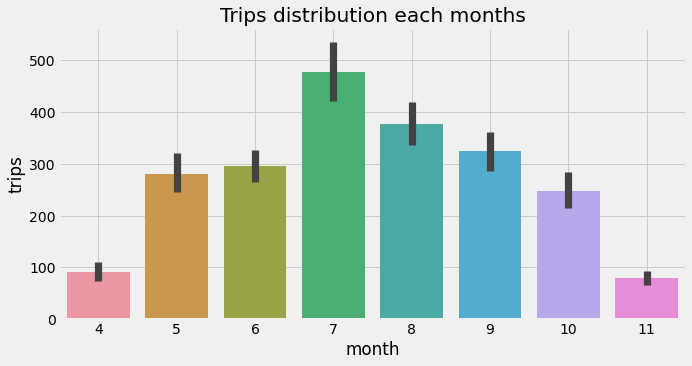

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=daily_trips, x='month', y='trips', estimator=sum)
plt.title("Trips distribution each months")
plt.grid(True)
plt.show()

#### Plotting the yearly counts to check for trends
Another potential assumption would be the yealry number of Bixi trips would rise due to increasing demand. We visually check this assumption with the plot below and see *no clear signs of yearly trends*.

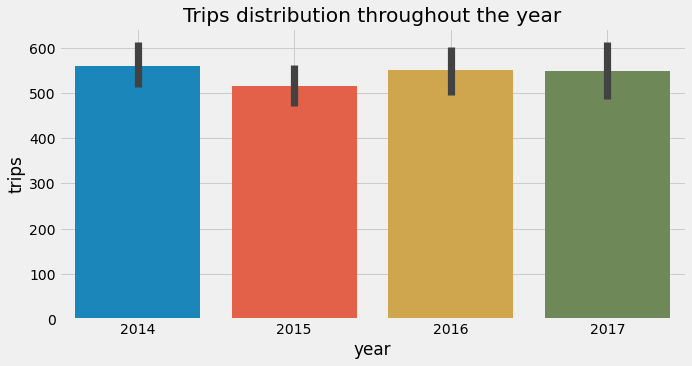

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=daily_trips, x='year', y='trips', estimator=sum)
plt.title("Trips distribution throughout the year")
plt.grid(True)
plt.show()

<br />

<br />

#### Save dataset to csv 
The data is small, csv is fine to work with here (lightweight, fast to read)

In [16]:
daily_trips[['trips','member_trips']].to_csv('daily_trips.csv')